# Aplicação do Autoencoder utilizando o dataset MNIST com Keras e posterior classificação dos dados processados

#### Importação das libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Dense, Input, Dropout
from keras.models import Model, Sequential

2025-07-30 20:00:30.066264: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753916430.085231   78169 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753916430.091030   78169 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753916430.106807   78169 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753916430.106829   78169 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753916430.106831   78169 computation_placer.cc:177] computation placer alr

#### Carregamento e tratamento dos dados

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)

val_max = x_train.max()
print(val_max)

(60000, 28, 28)
(10000, 28, 28)
255


In [3]:
# Normalizar os valores dos pixels para o intervalo [0, 1]
x_train = x_train / val_max
x_test = x_test / val_max

In [4]:
# Transformar as imagens em vetores unidimensionais (784 pixels)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [25]:
# Criação de um novo vetor de treinamento mas aplicando ruído na imagem
factor = 0.1
x_train_noisy = x_train + factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

print(x_train_noisy.shape)
print(x_test_noisy.shape)

(60000, 784)
(10000, 784)


#### Visualizar algumas imagens do treinamento

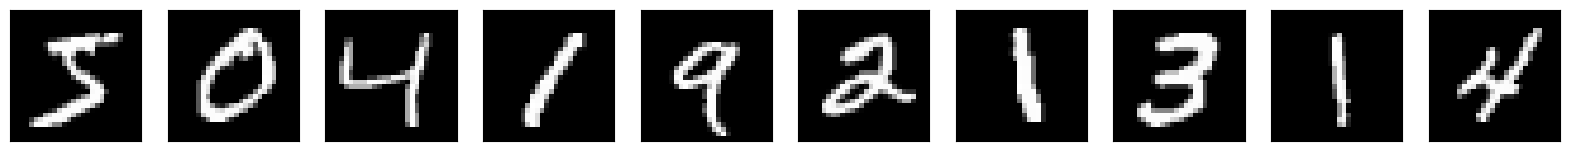

In [13]:
# Visualização antes da criação do vetor com ruído
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagem de entrada com ruído
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

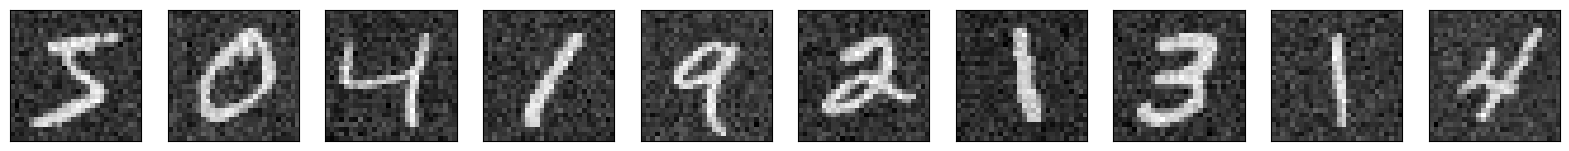

In [14]:
# Visualização do vetor com ruído
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagem de entrada com ruído
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### Construção do modelo Autoencoder com dados originais

In [15]:
# Definição da dimensão da representação codificada
n_latent = 60

# Criando o modelo do Autoencoder
model = Sequential()
# Primeira camada -> definição da dimensão de entrada (784)
model.add(Dense(units=400, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=n_latent, activation='relu'))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=400, activation='relu'))
# A última camada (camada de saída) deve ter a quantidade de neurônios igual ao tamanho da entrada (784)
# Para a função de ativação na camada de saída, utilizamos a função sigmoid
model.add(Dense(units = x_train.shape[1], activation='sigmoid'))

# Compilação do modelo
model.compile(optimizer='adam', loss='binary_crossentropy')

/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1753929205.182904   78169 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5425 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1


#### Treinamento com os dados originais e validação do modelo treinado com dados sem ruídos

In [16]:
# Treinar o Autoencoder
model.fit(x_train, x_train, epochs=30, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Codificando e decodificando as imagens de teste sem ruído
encoded_imgs = model.predict(x_test)

Epoch 1/30


I0000 00:00:1753929357.752553   83585 service.cc:152] XLA service 0x76896000d820 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753929357.752636   83585 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce GTX 1060, Compute Capability 6.1
2025-07-30 23:35:57.803542: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1753929358.324521   83585 cuda_dnn.cc:529] Loaded cuDNN version 90300


 31/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5003

I0000 00:00:1753929359.740904   83585 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.2003 - val_loss: 0.1261
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1130 - val_loss: 0.1018
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0991 - val_loss: 0.0944
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0925 - val_loss: 0.0902
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0888 - val_loss: 0.0864
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0860 - val_loss: 0.0842
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0839 - val_loss: 0.0825
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0822 - val_loss: 0.0813
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0808 - val_loss: 0.0798
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0798 - val_loss: 0.0793
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0787 - val_loss: 0.0777
Epoch 12/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0

#### Gráfico comparativo de dados original e dados gerados em forma de imagem - Sem ruído gerado

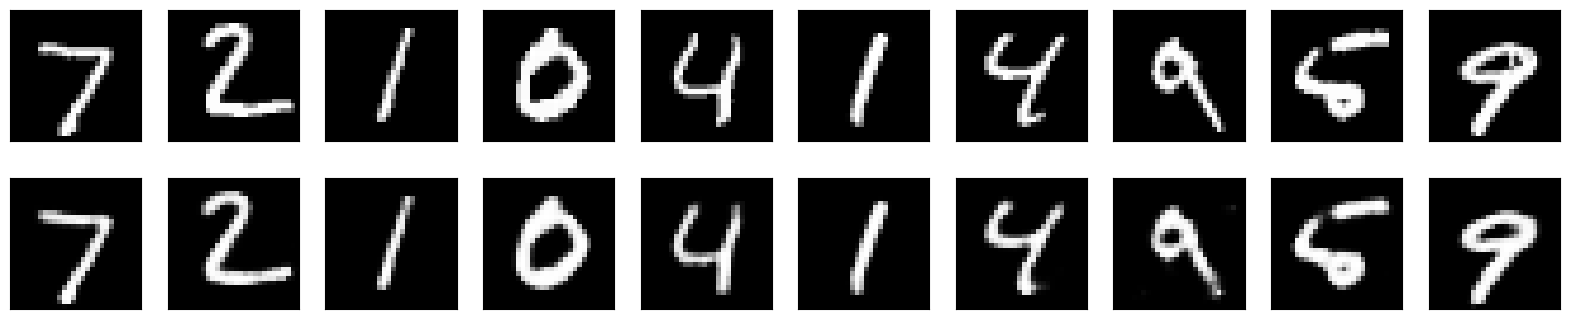

In [17]:
# Visualizar algumas imagens originais sem ruído e reconstruídas
n=10
plt.figure(figsize=(20, 4))
for i in range(n):
  # Imagem original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
  # Imagem reconstruída
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(encoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
plt.show()

#### Validação com dados com ruído usando o mesmo modelo treinado original

In [26]:
# Codificando e decodificando as imagens de teste com ruído
encoded_imgs = model.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


#### Gráfico comparativo de dados original e dados gerados em forma de imagem - com ruído gerado

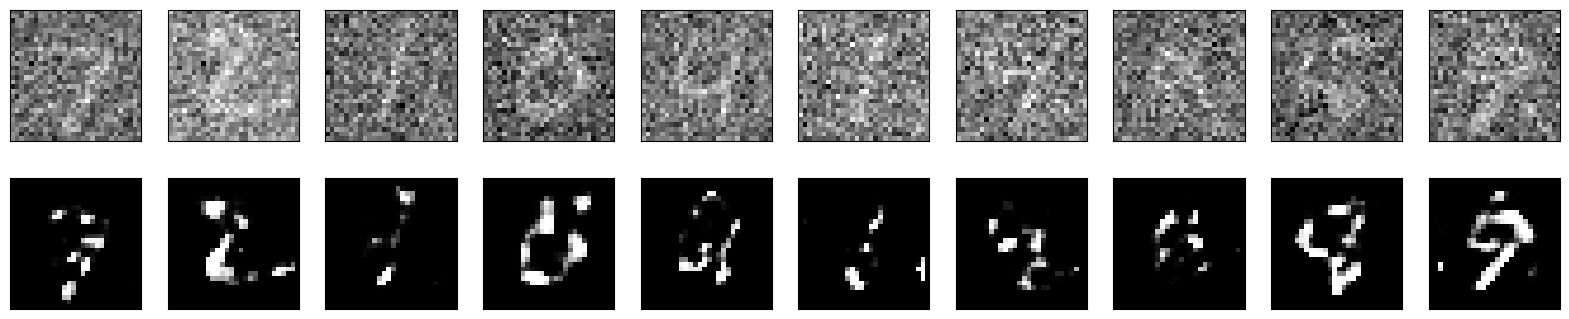

In [24]:
# Visualização de algumas imagens originais com ruído e reconstituídas
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # Imagem de entrada com ruído
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
  # Imagem reconstituída com redução de ruído
  ax = plt.subplot(2, n, i + 1 + n)
  ax.imshow(encoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

#### Criando um modelo de classificação  para testar as amostras ruidosas, amostras originais e as amostras recuperadas do ruído

In [28]:
# Dropout = 0.45
num_labels = len(np.unique(y_train))

model2 = Sequential()
model2.add(Dense(units=400, input_dim=x_train.shape[1], activation='relu'))
# model2.add(Dropout(dropout)) # Essa camada ajuda a evitar overfitting durante o treinamento, desligando aleatoriamente um certo número de neurônios durante cada passagem de treinamento
model2.add(Dense(units=100, activation='relu'))
# model2.add(Dropout(dropout))
# A função de ativação é softmax pois neste caso temos 10 rótulos como resultado da camada de saída
model2.add(Dense(units=num_labels, activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
model2.fit(x_train, y_train, epochs=40, batch_size=256)

Epoch 1/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9123 - loss: 0.3129
Epoch 2/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9656 - loss: 0.1164
Epoch 3/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9771 - loss: 0.0751
Epoch 4/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9844 - loss: 0.0534
Epoch 5/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9883 - loss: 0.0398
Epoch 6/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9914 - loss: 0.0297
Epoch 7/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9937 - loss: 0.0223
Epoch 8/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9961 - loss: 0.0150
Epoch 9/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9960 - loss: 0.0134
Epoch 10/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9976 - loss: 0.0094
Epoch 11/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9963 - loss: 0.0115
Epoch 12/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [30]:
loss, acc = model2.evaluate(x_test, y_test)
print("\nTeste de Acurácia Classificação sem Ruído: %.1f%%" % (100.0 * acc))
loss, acc = model2.evaluate(x_test_noisy, y_test)
print("\nTeste de Acurácia Classificação com Ruído: %.1f%%" % (100.0 * acc))
loss, acc = model2.evaluate(encoded_imgs, y_test)
print("\nTeste de Acurácia Classificação das Imagens Recuperadas do ruído: %.1f%%" % (100.0 * acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9847 - loss: 0.0853

Teste de Acurácia Classificação sem Ruído: 98.5%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9803 - loss: 0.1144

Teste de Acurácia Classificação com Ruído: 98.0%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9803 - loss: 0.1149

Teste de Acurácia Classificação das Imagens Recuperadas do ruído: 98.0%


#### Apresentando as métricas com SKLEARN

In [31]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report, mean_squared_error, ConfusionMatrixDisplay

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Avaliação da Classificação
Acurácia: 0.9847
MSE:  0.2912
Matriz de confusão das amostras não apresentadas no treinamento:
 [[ 973    0    2    1    0    1    0    0    2    1]
 [   0 1126    2    1    0    1    2    1    2    0]
 [   2    2 1012    3    1    0    3    4    4    1]
 [   0    0    2  995    0    2    0    2    3    6]
 [   1    1    4    0  966    0    2    1    1    6]
 [   2    0    0    8    1  878    1    0    1    1]
 [   3    2    0    1    3    4  944    0    1    0]
 [   0    5    6    0    0    0    0 1010    3    4]
 [   0    0    3    5    3    1    0    4  954    4]
 [   2    2    0    3    6    2    0    4    1  989]]

Relatório de classificação das amostras não apresentadas no treinamento:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3  

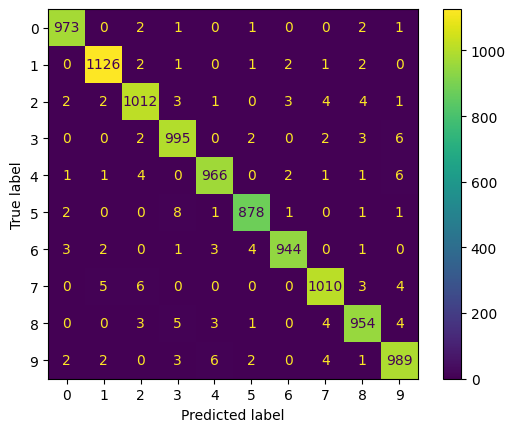

In [33]:
y_pred = model2.predict(x_test)

# Converter as previsões para classes
y_pred = np.argmax(y_pred, axis=1)

print("Avaliação da Classificação")
print("Acurácia:", accuracy_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print(f"Matriz de confusão das amostras não apresentadas no treinamento:\n {confusion_matrix(y_test, y_pred)}")
print("")
relatorio = classification_report(y_test, y_pred, target_names=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
print("Relatório de classificação das amostras não apresentadas no treinamento:")
print(relatorio)
print("")

conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
cm_display.plot()
plt.show()